<a href="https://colab.research.google.com/github/SamanZargarzadeh/Automatic-Image-Tagging-for-Fashion-E-commerce/blob/main/Deep_Learning_Array_to_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project

## Automatic Image Tagging for Fashion E-commerce  

Saman Zargarzadeh, Devy Yeap, Tiantian Gu, Tannaz Ebrahimi, Xia-Rong Zhang

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
import os
import gc
import sys
import json
import random
from pathlib import Path
import pandas as pd
import numpy as np

In [5]:
import pandas as pd
import numpy as np

In [8]:
# load the array 

train_set_x = np.load('/content/drive/MyDrive/train_set_x.npy')
test_set_x = np.load('/content/drive/MyDrive/test_set_x.npy')
cv_set_x = np.load('/content/drive/MyDrive/cv_set_x.npy')

train_set_y = np.load('/content/drive/MyDrive/train_set_y.npy')
test_set_y = np.load('/content/drive/MyDrive/test_set_y.npy')
cv_set_y = np.load('/content/drive/MyDrive/cv_set_y.npy')

# Tensorflow

In [9]:
train_set_x=train_set_x.T
test_set_x=test_set_x.T
cv_set_x=cv_set_x.T

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
from keras.optimizers import Adam



### A Neural Network with two hidden layers.


In [17]:
n_1=46
alpha= 0.0104
learning_rate = alpha 
lambd=0.1
epochs=10

In [18]:
modelD = Sequential()
modelD.add(Dense(n_1, activation='relu', input_shape=(7938,), kernel_regularizer=l2(lambd)))
modelD.add(Dense(4, activation='relu', kernel_regularizer=l2(lambd)))
modelD.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd)))

optimizer = Adam(learning_rate=learning_rate)

modelD.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyD = modelD.fit(train_set_x, train_set_y , epochs=epochs)
pd.DataFrame(historyD.history).head()

Epoch 1/10
150/150 [==============================] - 1s 4ms/step - loss: 2.2105 - accuracy: 0.4922
Epoch 2/10
150/150 [==============================] - 1s 4ms/step - loss: 0.7510 - accuracy: 0.4909
Epoch 3/10
150/150 [==============================] - 1s 4ms/step - loss: 0.7106 - accuracy: 0.4978
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: 0.7002 - accuracy: 0.5043
Epoch 5/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6966 - accuracy: 0.4972
Epoch 6/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6951 - accuracy: 0.5057
Epoch 7/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.4934
Epoch 8/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6941 - accuracy: 0.4964
Epoch 9/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.4820
Epoch 10/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.5036

,loss,accuracy
0,2.210474,0.492186
1,0.750953,0.490936
2,0.710551,0.497812
3,0.700159,0.504272
4,0.696550,0.497187


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

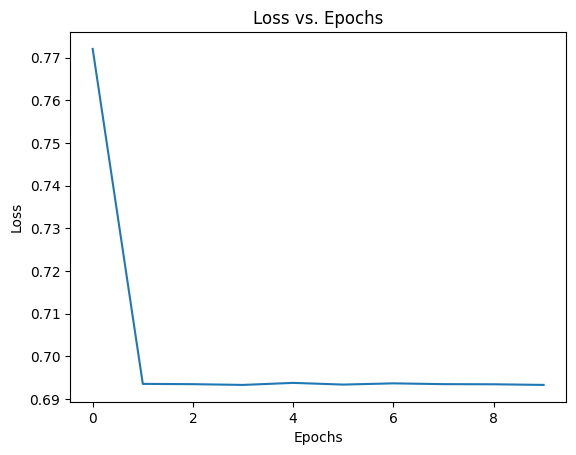

In [14]:
loss_plot = pd.DataFrame(historyD.history).plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [15]:
test_loss, test_accuracy = modelD.evaluate(test_set_x, test_set_y)

50/50 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4975


In [16]:
cv_loss, cv_accuracy = modelD.evaluate(cv_set_x, cv_set_y)

50/50 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4994
